## Bibliotecas: 

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as ptc
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score,
                             accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, roc_auc_score, roc_curve)
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from pycaret.classification import setup as config_clf, compare_models as comparar_clf, tune_model as otimizar_clf, pull as pegar_resultados_clf
from pycaret.regression import setup as config_reg, compare_models as comparar_reg

## Importação do dataset: 

In [77]:
from ucimlrepo import fetch_ucirepo 
  
dataset = fetch_ucirepo(id=942) 

In [78]:
df = dataset.data.features.copy()
df_alvos = dataset.data.targets.copy()
dados_completos = pd.concat([df, df_alvos], axis=1)

## Visualizando os dados: 

In [79]:
dados_completos

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,0.281148,...,0.0,29729182.96,29729182.96,29729182.96,29729182.96,0.0,64240,26847,502,MQTT_Publish
1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,0.282277,...,0.0,29855277.06,29855277.06,29855277.06,29855277.06,0.0,64240,26847,502,MQTT_Publish
2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,0.280164,...,0.0,29842149.02,29842149.02,29842149.02,29842149.02,0.0,64240,26847,502,MQTT_Publish
3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,0.281593,...,0.0,29913774.97,29913774.97,29913774.97,29913774.97,0.0,64240,26847,502,MQTT_Publish
4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,0.282111,...,0.0,29814704.90,29814704.90,29814704.90,29814704.90,0.0,64240,26847,502,MQTT_Publish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123112,59247,63331,tcp,-,0.000006,1,1,0,0,167772.160000,...,0.0,0.00,0.00,0.00,0.00,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
123113,59247,64623,tcp,-,0.000007,1,1,0,0,144631.172400,...,0.0,0.00,0.00,0.00,0.00,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
123114,59247,64680,tcp,-,0.000006,1,1,0,0,167772.160000,...,0.0,0.00,0.00,0.00,0.00,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
123115,59247,65000,tcp,-,0.000006,1,1,0,0,167772.160000,...,0.0,0.00,0.00,0.00,0.00,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN


In [80]:
dados_completos.columns

Index(['id.orig_p', 'id.resp_p', 'proto', 'service', 'flow_duration',
       'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot',
       'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec',
       'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot',
       'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot',
       'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count',
       'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
       'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count',
       'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count',
       'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot',
       'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min',
       'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg',
       'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.tot',
       '

## Traduzindo: 

In [81]:
from traducao import mapa_traducao
dados_completos.rename(columns=mapa_traducao, inplace=True)

In [82]:
dados_completos.columns

Index(['porta_origem', 'porta_destino', 'protocolo', 'servico',
       'duracao_fluxo', 'total_pacotes_env', 'total_pacotes_rec',
       'total_pacotes_dados_env', 'total_pacotes_dados_rec',
       'pacotes_env_por_seg', 'pacotes_rec_por_seg', 'pacotes_fluxo_por_seg',
       'razao_down_up', 'tam_cabecalho_env_total', 'tam_cabecalho_env_min',
       'tam_cabecalho_env_max', 'tam_cabecalho_rec_total',
       'tam_cabecalho_rec_min', 'tam_cabecalho_rec_max', 'contagem_flag_FIN',
       'contagem_flag_SYN', 'contagem_flag_RST', 'contagem_flag_PSH_env',
       'contagem_flag_PSH_rec', 'contagem_flag_ACK', 'contagem_flag_URG_env',
       'contagem_flag_URG_rec', 'contagem_flag_CWR', 'contagem_flag_ECE',
       'payload_env_min', 'payload_env_max', 'payload_env_total',
       'payload_env_media', 'payload_env_desvio', 'payload_rec_min',
       'payload_rec_max', 'payload_rec_total', 'payload_rec_media',
       'payload_rec_desvio', 'payload_fluxo_min', 'payload_fluxo_max',
       'payload_fl

In [83]:
dados_completos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 84 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   porta_origem              123117 non-null  int64  
 1   porta_destino             123117 non-null  int64  
 2   protocolo                 123117 non-null  object 
 3   servico                   123117 non-null  object 
 4   duracao_fluxo             123117 non-null  float64
 5   total_pacotes_env         123117 non-null  int64  
 6   total_pacotes_rec         123117 non-null  int64  
 7   total_pacotes_dados_env   123117 non-null  int64  
 8   total_pacotes_dados_rec   123117 non-null  int64  
 9   pacotes_env_por_seg       123117 non-null  float64
 10  pacotes_rec_por_seg       123117 non-null  float64
 11  pacotes_fluxo_por_seg     123117 non-null  float64
 12  razao_down_up             123117 non-null  float64
 13  tam_cabecalho_env_total   123117 non-null  i

In [84]:
dados_completos.describe()

,porta_origem,porta_destino,duracao_fluxo,total_pacotes_env,total_pacotes_rec,total_pacotes_dados_env,total_pacotes_dados_rec,pacotes_env_por_seg,pacotes_rec_por_seg,pacotes_fluxo_por_seg,...,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,tam_janela_inic_env,tam_janela_inic_rec,fwd_last_window_size
count,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,1.231170e+05,1.231170e+05,1.231170e+05,...,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,123117.000000,123117.000000,123117.000000
mean,34639.258738,1014.305092,3.809566,2.268826,1.909509,1.471218,0.820260,3.518063e+05,3.517620e+05,7.035683e+05,...,1.481354e+05,2.353599e+04,1.616655e+06,1.701956e+06,3.517644e+06,1.664985e+06,4.550183e+04,6118.905123,2739.776018,751.647514
std,19070.620354,5256.371994,130.005408,22.336565,33.018311,19.635196,32.293948,3.707645e+05,3.708015e+05,7.415634e+05,...,1.613007e+06,1.477935e+06,8.809396e+06,9.252337e+06,1.229508e+08,9.007064e+06,1.091361e+06,18716.313861,10018.848534,6310.183843
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,17702.000000,21.000000,0.000001,1.000000,1.000000,1.000000,0.000000,7.454354e+01,7.288927e+01,1.490871e+02,...,9.536740e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000
50%,37221.000000,21.000000,0.000004,1.000000,1.000000,1.000000,0.000000,2.467238e+05,2.467238e+05,4.934475e+05,...,4.053116e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000
75%,50971.000000,21.000000,0.000005,1.000000,1.000000,1.000000,0.000000,5.242880e+05,5.242880e+05,1.048576e+06,...,5.006790e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000
max,65535.000000,65389.000000,21728.335580,4345.000000,10112.000000,4345.000000,10105.000000,1.048576e+06,1.048576e+06,2.097152e+06,...,4.374931e+08,4.774862e+08,3.000000e+08,3.000000e+08,2.096777e+10,3.000000e+08,1.208029e+08,65535.000000,65535.000000,65535.000000


## Quantidade de nulos: 

In [85]:
dados_completos.isnull().sum().sum()

0

## Análise de zeros: 

In [86]:
zeros = ((dados_completos == 0).sum() / len(dados_completos)) * 100
print("\nTop 5 colunas com mais zeros (%):\n")
print(zeros.sort_values(ascending=False).head(5))


Top 5 colunas com mais zeros (%):

contagem_flag_URG_rec    100.000000
contagem_flag_CWR         99.942331
contagem_flag_ECE         99.941519
fwd_bulk_rate             99.800190
fwd_bulk_packets          99.800190
dtype: float64


## Identificando classes: 

In [87]:
coluna_alvo = 'tipo_ataque'
dados_completos[coluna_alvo].value_counts()

tipo_ataque
DOS_SYN_Hping                 94659
Thing_Speak                    8108
ARP_poisioning                 7750
MQTT_Publish                   4146
NMAP_UDP_SCAN                  2590
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  534
Wipro_bulb                      253
Metasploit_Brute_Force_SSH       37
NMAP_FIN_SCAN                    28
Name: count, dtype: int64

## Criando uma coluna binária: 

In [88]:
normal_classes = ['Thing_Speak', 'Wipro_bulb', 'MQTT_Publish'] 
dados_completos['eh_ataque'] = dados_completos[coluna_alvo].apply(lambda x: 0 if x in normal_classes else 1)

In [89]:
print("\nDistribuição Normal (0) vs Ataque (1):")
print(dados_completos['eh_ataque'].value_counts(normalize=True))


Distribuição Normal (0) vs Ataque (1):
eh_ataque
1    0.898414
0    0.101586
Name: proportion, dtype: float64


## Visualização de distribuições: 

Plotaremos um histograma da nossa variavel e um boxplot para identificar outliers.

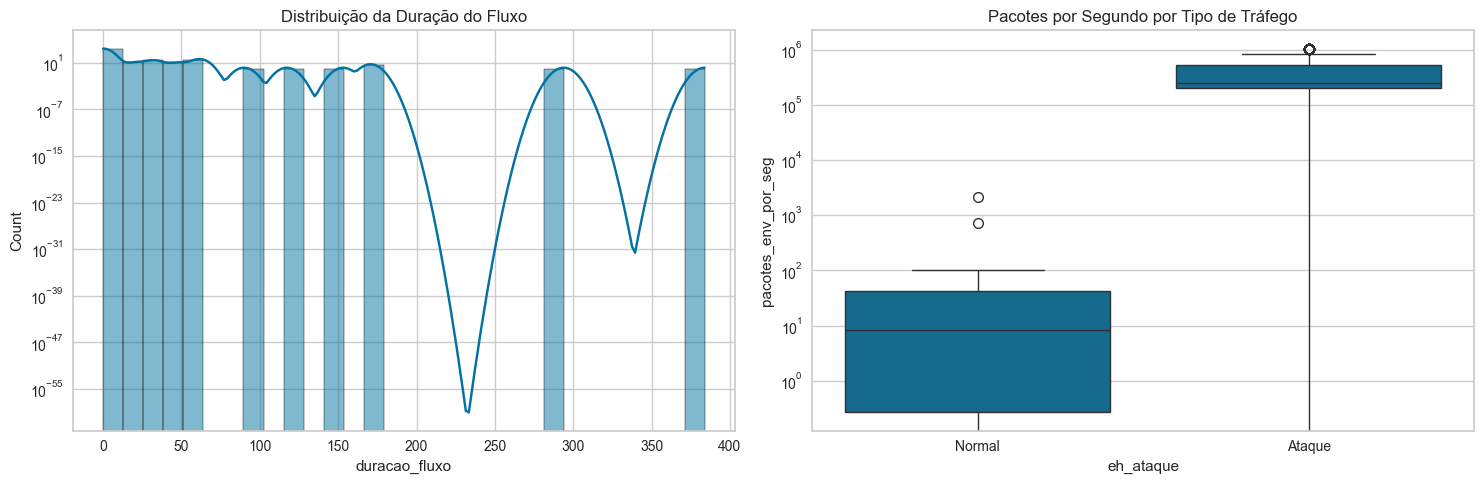

In [90]:
dados_amostra = dados_completos.sample(n=2000, random_state=42)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(dados_amostra['duracao_fluxo'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribuição da Duração do Fluxo')
axes[0].set_yscale('log')

sns.boxplot(x='eh_ataque', y='pacotes_env_por_seg', data=dados_amostra, ax=axes[1])
axes[1].set_title('Pacotes por Segundo por Tipo de Tráfego')
axes[1].set_yscale('log')
axes[1].set_xticklabels(['Normal', 'Ataque'])

plt.tight_layout()
plt.show()

## 3.4 Correlações

# Mapa de Calor de Correlação (apenas numéricas)

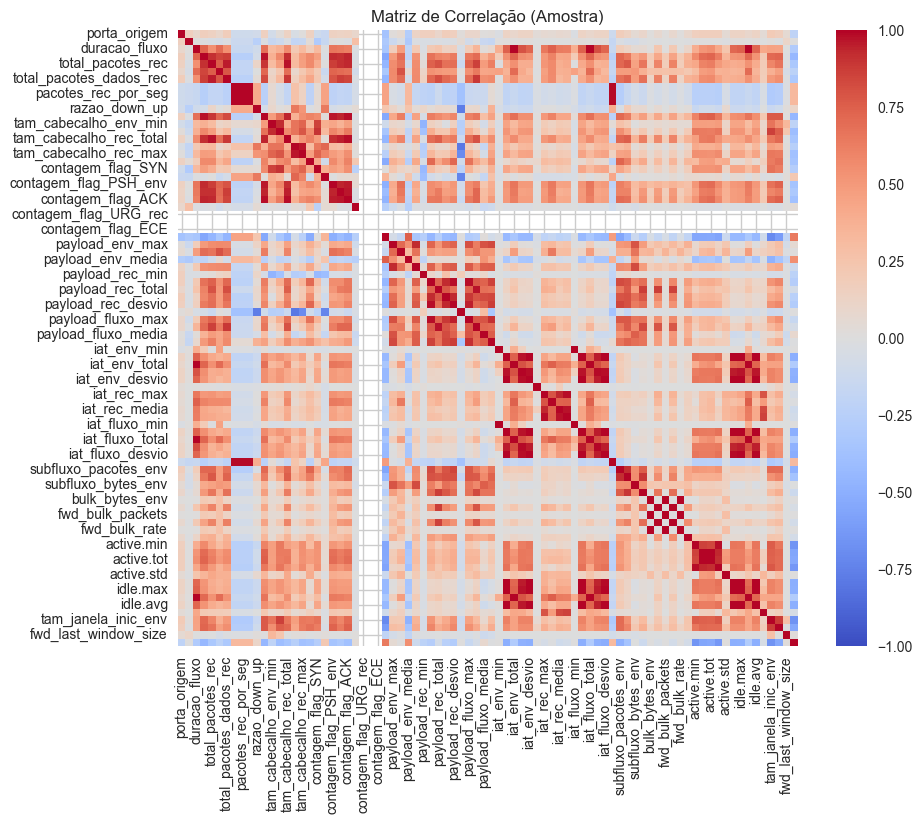

In [91]:
plt.figure(figsize=(10, 8))
corr = dados_amostra.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlação (Amostra)')
plt.show()

## 4. Modelagem: Regressão

Após entender a correlação entre os dados, iremos prever a nossa variavel usando modelos linear simples, multiplo e polinomial

# Adicionando variaveis: 

In [92]:
vars_regressao = ['total_pacotes_env', 'total_pacotes_rec', 'pacotes_env_por_seg'] 
alvo_regressao = 'duracao_fluxo'

X_reg = dados_completos[vars_regressao]
y_reg = dados_completos[alvo_regressao]

# Divisão de Treino: 

In [93]:
X_treino_r, X_teste_r, y_treino_r, y_teste_r = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Regressão Linear Multipla: 

In [94]:
X_train_r_sm = sm.add_constant(X_treino_r)
model_sm = sm.OLS(y_treino_r, X_train_r_sm).fit()

In [95]:
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          duracao_fluxo   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                 3.109e+04
Date:                Fri, 05 Dec 2025   Prob (F-statistic):               0.00
Time:                        10:35:01   Log-Likelihood:            -5.1336e+05
No. Observations:               86181   AIC:                         1.027e+06
Df Residuals:                   86177   BIC:                         1.027e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -7.0092      0.442    -15.857      0.000      -7.876      -6.143
total_pacotes_env       5.2076      0.017    303.588      0.000       5.174       5.241
total_pacotes_rec      -1.0941      0.009   -116.111      0.000      -1.113      -1.076
pacotes_env_por_seg  3.886e-06   8.59e-07      4.524      0.000     2.2e-06    5.57e-06
==============================================================================
Omnibus:                   349931.310   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    1080928015752.106
Skew:                         107.147   Prob(JB):                         0.00
Kurtosis:                   17351.627   Cond. No.                     7.11e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Regressão Polinomial: 

In [96]:
poly = PolynomialFeatures(degree=2)
X_treino_poly = poly.fit_transform(X_treino_r)
X_teste_poly = poly.transform(X_teste_r)

modelo_poly = LinearRegression()
modelo_poly.fit(X_treino_poly, y_treino_r)
previsoes_poly = modelo_poly.predict(X_teste_poly)

## Avaliar Desempenho: 

Para ficar mais simples a execução, criaremos uma função para ser necessário apenas a inserção dos dados como parâmetros.

In [97]:
def eval_metrics(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"[{model_name}] MAE: {mae:.4f} | RMSE: {rmse:.4f} | R2: {r2:.4f}")

# Avaliação Linear: 

In [99]:
eval_metrics(y_treino_r, model_sm.predict(sm.add_constant(X_treino_r)), "Linear Múltipla")

[Linear Múltipla] MAE: 5.3634 | RMSE: 93.4886 | R2: 0.5198


# Avaliação Polinomial: 

In [100]:
eval_metrics(y_teste_r, previsoes_poly, "Polinomial (Grau 2)")

[Polinomial (Grau 2)] MAE: 7.4628 | RMSE: 57.6196 | R2: 0.7606


## Diagnostico de Residuos: 

In [101]:
residuos = y_teste_r - previsoes_poly

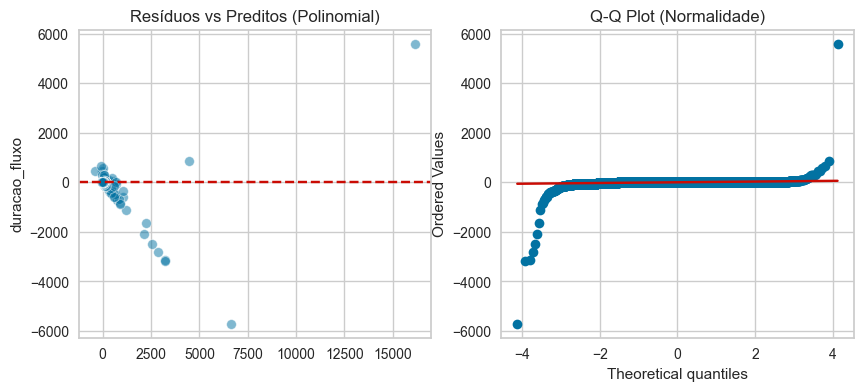

In [102]:
plt.figure(figsize=(10, 4))

# Scatter Plot:
plt.subplot(1, 2, 1)
sns.scatterplot(x=previsoes_poly, y=residuos, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.title('Resíduos vs Preditos (Polinomial)')

# Q-Q Plot:
plt.subplot(1, 2, 2)
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Q-Q Plot (Normalidade)')
plt.show()

## Classificação: 

In [105]:
cols_cat = ['protocolo', 'servico']
cols_cat = [c for c in cols_cat if c in dados_completos.columns]
X_cls = dados_completos.drop(columns=[coluna_alvo, 'eh_ataque'])

In [106]:
if cols_cat:
    X_cls = pd.get_dummies(X_cls, columns=cols_cat, drop_first=True)

y_cls = dados_completos['eh_ataque']

## Escalonamento

In [107]:
scaler = StandardScaler()
X_cls_scaled = pd.DataFrame(scaler.fit_transform(X_cls), columns=X_cls.columns)

In [108]:
X_treino_c, X_teste_c, y_treino_c, y_teste_c = train_test_split(X_cls_scaled, y_cls, test_size=0.3, random_state=42)

## Adicionando Modelos: 

In [109]:
modelos_manuais = {
    "Naive Bayes": GaussianNB(),
    "Regressão Logística": LogisticRegression(max_iter=1000)
}

In [110]:
for nome, modelo in modelos_manuais.items():
    modelo.fit(X_treino_c, y_treino_c)
    preds = modelo.predict(X_teste_c)
    print(f"\n--- {nome} ---")
    print(f"Acurácia: {accuracy_score(y_teste_c, preds):.4f}")
    print(f"F1 Score: {f1_score(y_teste_c, preds):.4f}")
    print("Matriz de Confusão:")
    print(confusion_matrix(y_teste_c, preds))


--- Naive Bayes ---
Acurácia: 0.9461
F1 Score: 0.9702
Matriz de Confusão:
[[ 2556  1220]
 [  770 32390]]

--- Regressão Logística ---
Acurácia: 0.9886
F1 Score: 0.9937
Matriz de Confusão:
[[ 3587   189]
 [  231 32929]]


In [114]:
cols_para_mostrar = ['Model', 'Accuracy', 'F1', 'Prec.', 'Recall']

In [115]:
cols_existentes = [c for c in cols_para_mostrar if c in resultados.columns]

In [ ]:
dados_pycaret = dados_completos.sample(n=5000, random_state=123)

print("Inicializando setup do PyCaret...")
exp_clf = config_clf(
    data=dados_pycaret, 
    target='eh_ataque',
    ignore_features=[coluna_alvo], 
    session_id=123,
    verbose=False,
    html=False 
)

print("\nComparando modelos de Classificação...")
melhor_modelo = comparar_clf(n_select=1, sort='F1')
print(f"\nMelhor modelo encontrado: {melhor_modelo}")

Inicializando setup do PyCaret...

Comparando modelos de Classificação...


                                    Model  Accuracy     AUC  Recall   Prec.  \
gbc          Gradient Boosting Classifier    0.9951  0.9983  0.9971  0.9975   
et                 Extra Trees Classifier    0.9946  0.9983  0.9978  0.9962   
lightgbm  Light Gradient Boosting Machine    0.9946  0.9972  0.9971  0.9968   
dt               Decision Tree Classifier    0.9943  0.9895  0.9955  0.9981   
rf               Random Forest Classifier    0.9943  0.9984  0.9971  0.9965   
ada                  Ada Boost Classifier    0.9940  0.9993  0.9962  0.9971   
qda       Quadratic Discriminant Analysis    0.9934  0.9839  0.9984  0.9943   
knn                K Neighbors Classifier    0.9846  0.9876  0.9895  0.9933   
lda          Linear Discriminant Analysis    0.9743  0.9692  0.9806  0.9907   
ridge                    Ridge Classifier    0.9729  0.9684  0.9806  0.9891   
lr                    Logistic Regression    0.9689  0.9732  0.9911  0.9748   
svm                   SVM - Linear Kernel    0.9480 

In [121]:
resultados = pegar_resultados_clf()
print("\nColunas disponíveis nos resultados:", resultados.columns.tolist())
    
cols_para_mostrar = ['Model', 'Accuracy', 'F1', 'Prec.', 'Recall']
    
print("\nTop 5 Modelos (Ranking):")
print(resultados.head(5)[cols_para_mostrar])


Colunas disponíveis nos resultados: ['Model', 'Accuracy', 'AUC', 'Recall', 'Prec.', 'F1', 'Kappa', 'MCC', 'TT (Sec)']

Top 5 Modelos (Ranking):
                                    Model  Accuracy      F1   Prec.  Recall
gbc          Gradient Boosting Classifier    0.9951  0.9973  0.9975  0.9971
et                 Extra Trees Classifier    0.9946  0.9970  0.9962  0.9978
lightgbm  Light Gradient Boosting Machine    0.9946  0.9970  0.9968  0.9971
dt               Decision Tree Classifier    0.9943  0.9968  0.9981  0.9955
rf               Random Forest Classifier    0.9943  0.9968  0.9965  0.9971


In [122]:
print(f"\nOtimizando hiperparâmetros do {melhor_modelo}...")
modelo_tunado = otimizar_clf(melhor_modelo, verbose=False)
print("Modelo otimizado com sucesso.")
print(modelo_tunado)


Otimizando hiperparâmetros do GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)...
Modelo otimizado com sucesso.
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.4, loss='log_loss', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.3, min_samples_leaf=4,
                